In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ignore harmless warnings 

import warnings
warnings.filterwarnings('ignore')

In [2]:
bmidata = pd.read_csv(r"D:\iiit notes\Internship\10-Seasion 24-May-2021\Predict_BMI_Analysis_V10.csv")
bmidata.head()

,Height M,Weight kg,%Fat,BMI
0,1.60,49.44,23.9,19.31
1,1.65,62.60,28.8,22.96
2,1.65,75.75,32.4,27.79
3,1.53,48.99,25.8,20.92
4,1.45,43.09,22.5,20.38


In [3]:
bmidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Height M   92 non-null     float64
 1   Weight kg  92 non-null     float64
 2   %Fat       92 non-null     float64
 3   BMI        92 non-null     float64
dtypes: float64(4)
memory usage: 3.0 KB


In [4]:
bmidata.shape

(92, 4)

In [5]:
len(bmidata.columns)

4

In [6]:
bmidata.isnull().sum()

Height M     0
Weight kg    0
%Fat         0
BMI          0
dtype: int64

In [7]:
bmidata.isnull().values.any()

False

In [8]:
x = pd.DataFrame(bmidata['Weight kg'])
x.head()

,Weight kg
0,49.44
1,62.60
2,75.75
3,48.99
4,43.09


In [9]:
y = pd.DataFrame(bmidata['BMI'])

In [10]:
y.head()

,BMI
0,19.31
1,22.96
2,27.79
3,20.92
4,20.38


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [12]:
from sklearn.linear_model import LinearRegression

slreg = LinearRegression()
slreg.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred = slreg.predict(x_test)

In [14]:
print(slreg.predict([[60]]))

[[24.60128158]]


In [15]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test,y_pred), 2))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test,y_pred), 2))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)), 2))
print('Mean Absolute Precentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y_pred), 2)*100, '%')
print('R2_score:',round(metrics.r2_score(y_test,y_pred), 2))

Mean Absolute Error (MAE): 1.27
Mean Squared Error (MSE): 2.55
Root Mean Squared Error (RMSE): 1.6
Mean Absolute Precentage Error (MAPE): 6.0 %
R2_score: 0.85


In [16]:
def MAPE(y_pred,y_test):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test-y_pred)/y_test))*100

In [17]:
result = MAPE(y_pred, y_test)
print('Mean Absolute Percentage Error (MAPE):',round(result, 2),'%')

Mean Absolute Percentage Error (MAPE): 5.71 %


Text(0, 0.5, 'BMI')

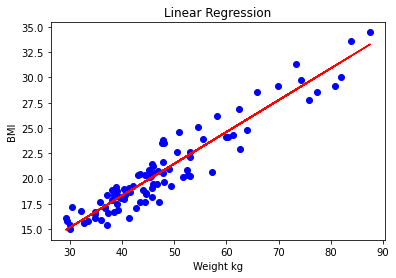

In [18]:
plt.scatter(x, y, color ='blue')
plt.plot(x, slreg.predict(x), color = 'red')
plt.title("Linear Regression")
plt.xlabel("Weight kg")                     
plt.ylabel("BMI")
# plt.show()

In [19]:
bmidata.head()

,Height M,Weight kg,%Fat,BMI
0,1.60,49.44,23.9,19.31
1,1.65,62.60,28.8,22.96
2,1.65,75.75,32.4,27.79
3,1.53,48.99,25.8,20.92
4,1.45,43.09,22.5,20.38


In [20]:
x1 = bmidata.iloc[:,:-1]
y1 = bmidata.iloc[:,-1]

In [21]:
x1.head()

,Height M,Weight kg,%Fat
0,1.60,49.44,23.9
1,1.65,62.60,28.8
2,1.65,75.75,32.4
3,1.53,48.99,25.8
4,1.45,43.09,22.5


In [22]:
y1.head()

0    19.31
1    22.96
2    27.79
3    20.92
4    20.38
Name: BMI, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [24]:
from sklearn.linear_model import LinearRegression

mulreg = LinearRegression()
mulreg.fit(x1_train, y1_train)

LinearRegression()

In [25]:
y1_pred = mulreg.predict(x1_test)

In [26]:
from sklearn import metrics 

print('Mean Absolute Error(MAE)', round(metrics.mean_absolute_error(y1_pred, y1_test), 2))
print('Mean Squared Error(MSE)', round(metrics.mean_squared_error(y1_pred, y1_test), 2))
print('Root Mean Squared Error(RMSE)', round(np.sqrt(metrics.mean_squared_error(y1_pred, y1_test)), 2))
print('Mean Absolute Percentage Error(MAPE)', round(metrics.mean_absolute_percentage_error(y1_pred, y1_test), 2))
print('R2_Score:', round(metrics.r2_score(y1_pred, y1_test), 2))

Mean Absolute Error(MAE) 1.1
Mean Squared Error(MSE) 1.93
Root Mean Squared Error(RMSE) 1.39
Mean Absolute Percentage Error(MAPE) 0.05
R2_Score: 0.9


In [28]:
from statsmodels.api import OLS

OLS(y1_pred, y1_test).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              6388.
Date:                Fri, 25 Jun 2021   Prob (F-statistic):                    1.29e-33
Time:                        22:55:33   Log-Likelihood:                         -48.819
No. Observations:                  28   AIC:                                      99.64
Df Residuals:                      27   BIC:                                      101.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BMI            0.9946      0.012     79.922      0.000       0.969       1.020
==============================================================================
Omnibus:                        0.069   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.271
Skew:                          -0.069   Prob(JB):                        0.873
Kurtosis:                       2.538   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
r_squared = round(metrics.r2_score(y_test, y_pred), 3)

In [30]:
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),3)

In [31]:
print(r_squared, adjusted_r_squared)

0.854 0.852


In [32]:
print(mulreg.intercept_)

[5.85731812]


In [33]:
print(mulreg.coef_)

[[0.31019802]]


In [34]:
from sklearn.metrics import r2_score
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.854
